<a href="https://colab.research.google.com/github/MuhammadFayyazq125/Deep_learning_work/blob/main/cat_and_dog_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
/content/drive/MyDrive/kaggle_dataset_cat_and_dog/dogs-vs-cats

SyntaxError: ignored

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Instantiating the VGG16 convolutional base

In [5]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [12]:
base_dir = '/content/drive/MyDrive/kaggle_dataset_cat_and_dog/My_work_on_cats_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Extracting features using the pretrained convolutional base

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [14]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    

In [15]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them
to a densely connected classifier, so first you must flatten them to (samples, 8192):

In [16]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

Defining and training the densely connected classifier

In [17]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5918 - acc: 0.6885 - val_loss: 0.4384 - val_acc: 0.8300
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4278 - acc: 0.8045 - val_loss: 0.3616 - val_acc: 0.8680
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3634 - acc: 0.8410 - val_loss: 0.3219 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3093 - acc: 0.8750 - val_loss: 0.2976 - val_acc: 0.8910
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2786 - acc: 0.8925 - val_loss: 0.2806 - val_acc: 0.8940
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2573 - acc: 0.8975 - val_loss: 0.2875 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2411 - acc: 0.9045 - val_loss: 0.2649 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

Note: Training is very fast, because you only have to deal with two Dense layers—an epoch takes less than one second even on CPU.

lets look at the loss and accuracy curves during training
Plotting the results

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

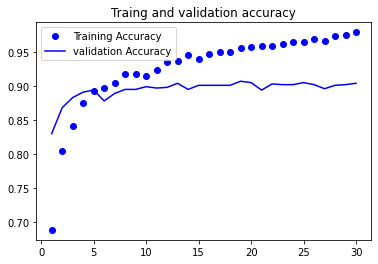

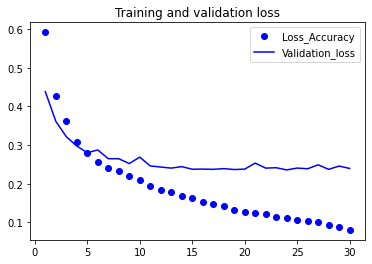

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc , 'bo' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'b' , label = 'validation Accuracy')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo',label = 'Loss_Accuracy')
plt.plot(epochs, val_loss , 'b', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


in the first graph we can see that the training and validation is better enough than before and reached greater than 95% accuracy which mean our model is muchh stable to detect any image of dog and cat and validation acc of the model reached at 90% 

second graph is showing the loss and validation loss while training and we can see during training training loss is keep decreasing

this was the first technique through which we trained our model very quickly now lets look at the second technique

## FEATURE EXTRACTION WITH DATA AUGMENTATION

Note: this technique is too expensive to attempt on CPU for this we need to connect with GPU. If you dont want to run your code in GPU then previous technique is the good choice for you to follow on CPU.

step1 : Adding a densely connected classifier on top of the convolutional base

In [31]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights After freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4
This is the number of trainable weights After freezing the conv base: 4


Now we can start training our model, with the same data-augmentation configution

Training the model end to end with a frozen convolutional base

In [35]:
train_datagen = ImageDataGenerator( rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150, 150) , batch_size=20 , class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir , target_size=(150, 150), batch_size=20, class_mode='binary')
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 25s 243ms/step - loss: 0.5762 - acc: 0.7271 - val_loss: 0.4426 - val_acc: 0.8430
Epoch 2/30
100/100 [==============================] - 22s 217ms/step - loss: 0.4834 - acc: 0.7784 - val_loss: 0.3799 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 21s 211ms/step - loss: 0.4365 - acc: 0.8090 - val_loss: 0.3293 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 21s 212ms/step - loss: 0.4030 - acc: 0.8146 - val_loss: 0.3167 - val_acc: 0.8620
Epoch 5/30
100/100 [==============================] - 21s 210ms/step - loss: 0.3843 - acc: 0.8342 - val_loss: 0.2958 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 21s 213ms/step - loss: 0.3760 - acc: 0.8377 - val_loss: 0.2862 - val_acc: 0.8760
Epoch 7/30
100/100 [==============================] - 21s 211ms/step - loss: 0.3544 - acc: 0.8447 - val_loss: 0.2745 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 2

lets plot our results again 

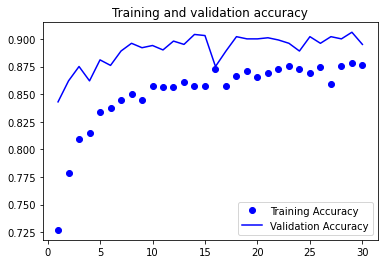

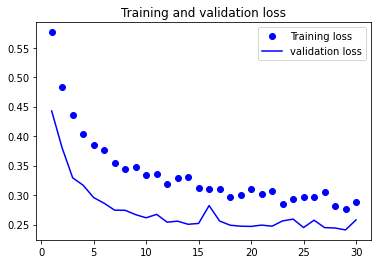

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs , acc , 'bo', label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy') #Training and validation accuracy for feature extraction with data augmentation
plt.legend()

plt.figure()

plt.plot(epochs , loss, 'bo', label = 'Training loss' )
plt.plot(epochs , val_loss, 'b', label = 'validation loss' )
plt.title('Training and validation loss')
plt.legend()

plt.show()

Note: we have trained our model using a pre-trained model with the help of data augmentation

lets look into another way to get better accuracy using pre-trained model

Fine-tuning is the widely used technique for model reuse, complementary to feature extraction. fine-tunning technique allow us to freeze all layers of pre-trained model except last one layer by which we connect our layer

step 1 :Freezing all layers up to a specific one

In [38]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that
you want to limit the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

**Fine-tuning the model**

In [39]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 24s 217ms/step - loss: 0.3005 - acc: 0.8734 - val_loss: 0.2209 - val_acc: 0.9090
Epoch 2/100
100/100 [==============================] - 22s 219ms/step - loss: 0.2604 - acc: 0.8899 - val_loss: 0.3450 - val_acc: 0.8660
Epoch 3/100
100/100 [==============================] - 22s 217ms/step - loss: 0.2347 - acc: 0.8980 - val_loss: 0.2055 - val_acc: 0.9240
Epoch 4/100
100/100 [==============================] - 22s 215ms/step - loss: 0.2318 - acc: 0.9020 - val_loss: 0.2038 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 22s 216ms/step - loss: 0.1872 - acc: 0.9161 - val_loss: 0.1975 - val_acc: 0.9290
Epoch 6/100
100/100 [==============================] - 22s 215ms/step - loss: 0.2126 - acc: 0.9095 - val_loss: 0.1878 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.1834 - acc: 0.9271 - val_loss: 0.1845 - val_acc: 0.9320
Epoch 8/100
100/100 [===========================

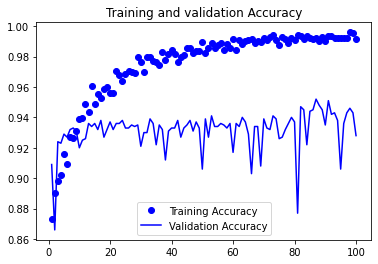

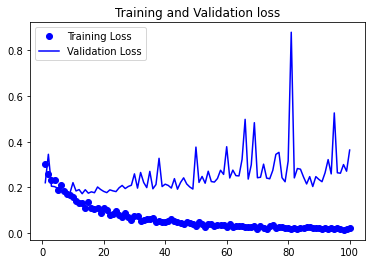

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo', label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss , 'bo', label='Training Loss')
plt.plot(epochs, val_loss , 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

these above curves look noisy we can smooth it by replacing every loss and accuracy exponential moving averages of these quantity for that we use trivial utility function to do this.


**Smoothing the plots**

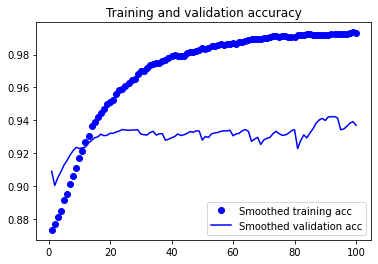

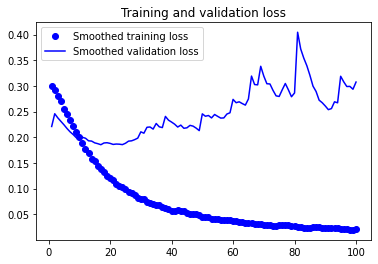

In [42]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Now we can evaluate our model on the test data**

In [45]:
test_generator = test_datagen.flow_from_directory( test_dir, target_size=(150, 150), batch_size=20 , class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:',round(test_acc*100,2),'%')

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 93.0 %
